In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline


In [2]:
data_dir = "./data/"


In [3]:
df = pd.read_csv(os.path.join(data_dir, "evals.csv"))

In [4]:
df.head()

,eval_id,learner_id,audience,group,level,role,organization,pronouns,sexuality,ethnicity,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
0,70000,0,Employee,PM,5,Science,CBSA,SheHer,Heterosexual,Caucasian,...,True,True,True,False,False,False,False,False,False,False
1,70000,0,Employee,PM,5,Science,CBSA,SheHer,Heterosexual,Caucasian,...,True,False,False,False,True,False,True,False,False,False
2,70001,1,Specialist,CR,3,Operations,IRCC,HeHim,Heterosexual,Asian,...,True,False,True,True,False,False,False,False,False,False
3,70001,1,Specialist,CR,3,Operations,IRCC,HeHim,Heterosexual,Asian,...,True,False,False,True,True,False,False,True,True,True
4,70002,2,Employee,FI,1,Administrative,PSC,HeHim,NoAnswer,Caucasian,...,True,False,True,False,False,False,False,False,False,False


In [5]:
df.describe()

,eval_id,learner_id,level,registration_id,offering_id,module,current_skill,desired_skill,final_skill,rating,percent_completed
count,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000
mean,80618.420684,10618.420684,3.359059,99624.641524,960.199067,181.865474,2.593183,4.747797,2.789787,5.382841,0.786185
std,7906.514896,7906.514896,1.785741,73716.390247,94.998638,96.418462,1.849674,1.919487,1.888027,2.199796,0.185746
min,70000.000000,0.000000,1.000000,0.000000,877.000000,101.000000,0.000000,2.000000,0.000000,1.000000,0.000000
25%,73428.750000,3428.750000,2.000000,30428.750000,880.000000,101.000000,1.000000,3.000000,1.000000,4.000000,0.700000
50%,77357.500000,7357.500000,3.000000,70357.500000,884.000000,102.000000,2.000000,5.000000,3.000000,5.000000,0.800000
75%,89570.250000,19570.250000,5.000000,182141.250000,1077.000000,301.000000,4.000000,6.000000,4.000000,7.000000,1.000000
max,91999.000000,21999.000000,7.000000,192999.000000,1078.000000,301.000000,10.000000,12.000000,11.000000,10.000000,1.000000


In [6]:
audience = df.audience
role = df.role

In [7]:
scan = df.drop(['eval_id', 'learner_id', 'registration_id', 'offering_id'], axis=1)

In [8]:
scan.groupby(['audience', 'role', 'ethnicity']).agg('mean')

level  person_with_disability  \
audience   role           ethnicity                                          
Employee   Administrative Asian           3.219512                0.146341   
                          Black           3.608696                0.173913   
                          Caucasian       2.983918                0.092105   
                          HispanicLatinx  3.117647                0.098039   
                          Indigenous      3.038462                0.096154   
...                                            ...                     ...   
Specialist Security       Black           3.250000                0.000000   
                          Caucasian       3.106383                0.031915   
                          HispanicLatinx  5.000000                0.000000   
                          Indigenous      2.200000                0.000000   
                          NoAnswer        1.666667                0.000000   

                                              module  current_skill  \
audience   role           ethnicity                                   
Employee   Administrative Asian           198.829268       3.073171   
                          Black           188.239130       2.586957   
                          Caucasian       182.005848       2.726608   
                          HispanicLatinx  199.294118       2.568627   
                          Indigenous      162.884615       2.884615   
...                                              ...            ...   
Specialist Security       Black           301.000000       4.000000   
                          Caucasian       167.297872       2.787234   
                          HispanicLatinx  168.000000       1.666667   
                          Indigenous      141.400000       3.200000   
                          NoAnswer        168.000000       2.000000   

                                          desired_skill  final_skill  \
audience   role           ethnicity                                    
Employee   Administrative Asian                5.463415     3.146341   
                          Black                4.586957     2.826087   
                          Caucasian            4.897661     2.947368   
                          HispanicLatinx       4.686275     2.764706   
                          Indigenous           5.019231     3.134615   
...                                                 ...          ...   
Specialist Security       Black                6.000000     4.250000   
                          Caucasian            5.148936     3.053191   
                          HispanicLatinx       3.666667     1.666667   
                          Indigenous           5.200000     3.600000   
                          NoAnswer             4.333333     2.333333   

                                          recommend    rating     clear  \
audience   role           ethnicity                                       
Employee   Administrative Asian            0.536585  5.219512  0.341463   
                          Black            0.456522  5.391304  0.478261   
                          Caucasian        0.517544  5.526316  0.463450   
                          HispanicLatinx   0.509804  5.588235  0.411765   
                          Indigenous       0.403846  5.365385  0.538462   
...                                             ...       ...       ...   
Specialist Security       Black            0.500000  5.250000  0.500000   
                          Caucasian        0.574468  5.723404  0.478723   
                          HispanicLatinx   0.333333  4.666667  0.333333   
                          Indigenous       0.400000  5.200000  0.000000   
                          NoAnswer         0.666667  6.666667  0.333333   

                                          entertaining  ...  digital_content  \
audience   role           ethnicity                     ...                    
Employee   Administrative Asian  

In [9]:
scan.groupby('module').agg('mean')

,level,person_with_disability,current_skill,desired_skill,final_skill,recommend,rating,clear,entertaining,relevant,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
module,,,,,,,,,,,,,,,,,,,,,
101,3.367556,0.103778,2.574000,4.726222,2.585556,0.356000,4.718889,0.454000,0.360667,0.576444,...,1.0,0.226222,0.545556,0.239556,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
102,3.367556,0.103778,2.574000,4.726222,3.140000,0.471556,5.374444,0.482889,0.601333,0.355778,...,1.0,0.163778,0.180222,0.231778,1.0,0.519778,0.318667,0.344667,0.371333,0.603111
201,3.356481,0.083333,2.606481,4.745370,2.606481,0.199074,3.888889,0.513889,0.222222,0.504630,...,0.0,0.000000,0.000000,0.000000,1.0,0.421296,0.212963,0.518519,0.472222,0.240741
202,3.356481,0.083333,2.606481,4.745370,3.125000,0.587963,6.032407,0.555556,0.439815,0.601852,...,0.0,0.000000,0.000000,0.000000,1.0,0.375000,0.245370,0.430556,0.458333,0.194444
301,3.346500,0.096500,2.621000,4.780333,2.674833,0.582333,5.917500,0.467167,0.597333,0.587500,...,1.0,0.390667,0.298500,0.450500,1.0,0.437500,0.605667,0.482500,0.538500,0.353333


In [41]:
feedback = scan.drop(["level", "current_skill", "desired_skill", "final_skill", "rating"], axis=1)

skill = scan[["module", "current_skill", "desired_skill", "final_skill"]]
learning_obj = scan[["module", "lo_1", "lo_2"]]

core = feedback[["module", "recommend", "clear", "entertaining", "relevant", "informative", "useful", "inclusive"]]
digital = feedback[["module", "digital_smooth", "digital_professional", "digital_accessible"]]
physical = feedback[["module", "physical_clean", "physical_pleasant", "physical_accessible", "physical_professional", "physical_comfortable"]]
personnel = feedback[["module", "personnel_pleasant", "personnel_helpful", "personnel_professional", "personnel_inclusive", "personnel_knowledgeable"]]


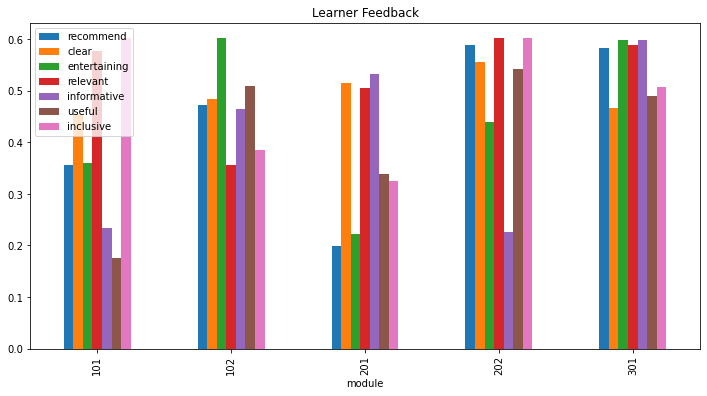

In [43]:
core.groupby("module").agg('mean').plot(title="Learner Feedback", kind="bar", figsize=(12,6))

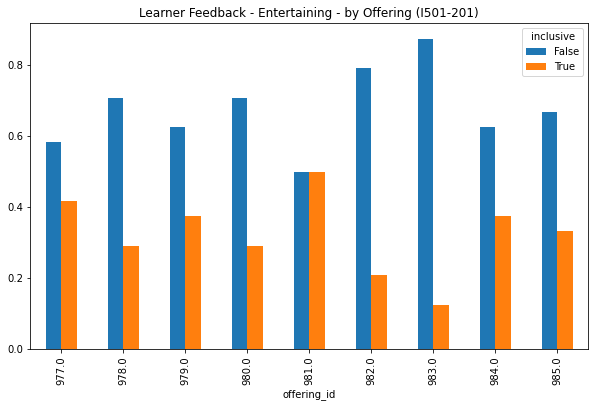

In [45]:
pd.crosstab(df.offering_id.where(df.module==201), df.inclusive, normalize="index").plot(title="Learner Feedback - Entertaining - by Offering (I501-201)", kind="bar", figsize=(10,6))

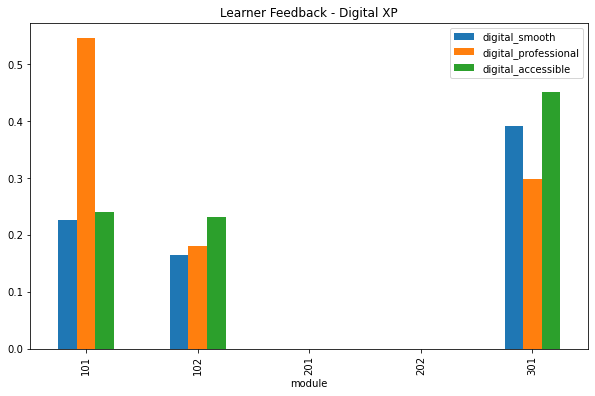

In [13]:
digital.groupby("module").agg('mean').plot(title="Learner Feedback - Digital XP", kind="bar", figsize=(10,6))

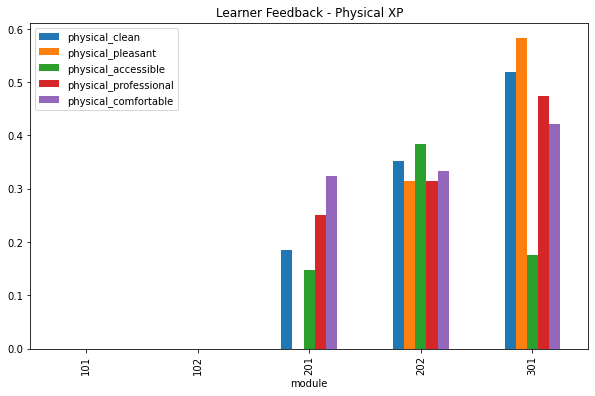

In [14]:
physical.groupby("module").agg('mean').plot(title="Learner Feedback - Physical XP", kind="bar", figsize=(10,6))

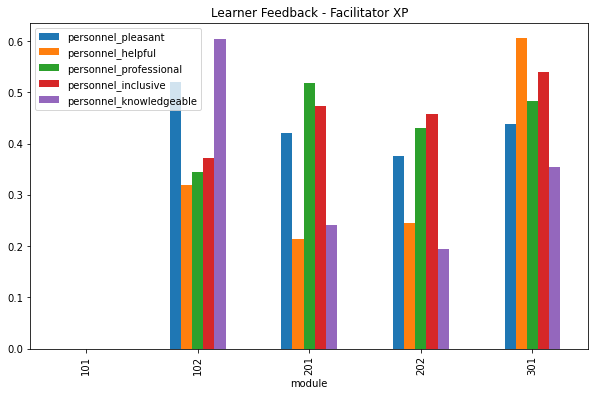

In [15]:
personnel.groupby("module").agg('mean').plot(title="Learner Feedback - Facilitator XP", kind="bar", figsize=(10,6))

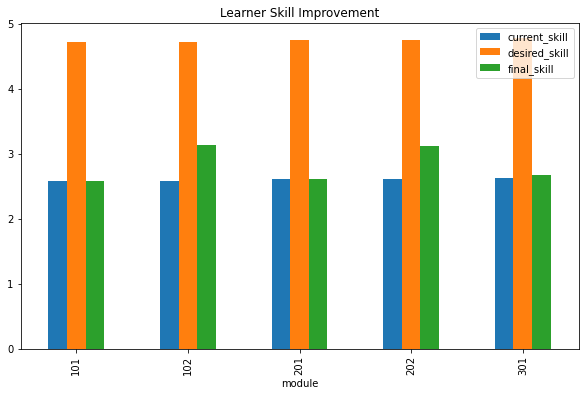

In [16]:
skill.groupby("module").agg('mean').plot(title="Learner Skill Improvement", kind="bar", figsize=(10,6))

In [17]:
learning_obj.lo_1.unique()

array(['Meet', 'NotMeet', 'Exceeded'], dtype=object)

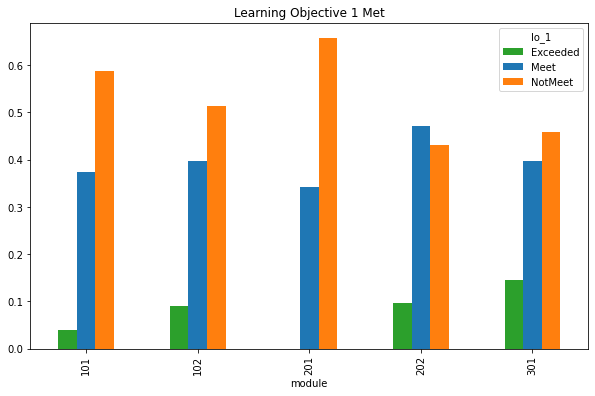

In [18]:
pd.crosstab(learning_obj.module, learning_obj.lo_1, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 1 Met", figsize=(10,6))

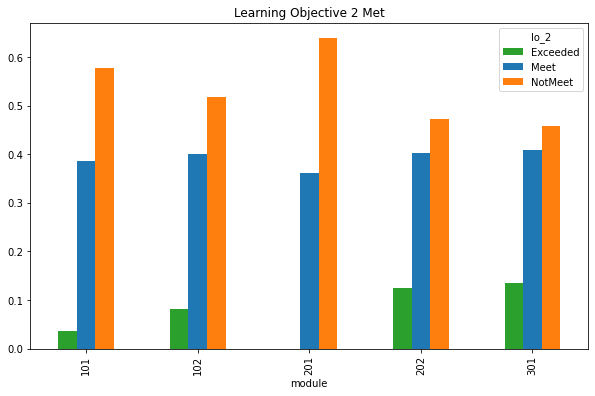

In [19]:
pd.crosstab(learning_obj.module, learning_obj.lo_2, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 2 Met", figsize=(10,6))

In [20]:
learning_obj.columns

Index(['module', 'lo_1', 'lo_2'], dtype='object')

In [21]:
eleven_grad=["darkred", "brown", "darkorange", "orange", "gold", "dodgerblue", "royalblue", "blue", "green", "forestgreen", "limegreen"]

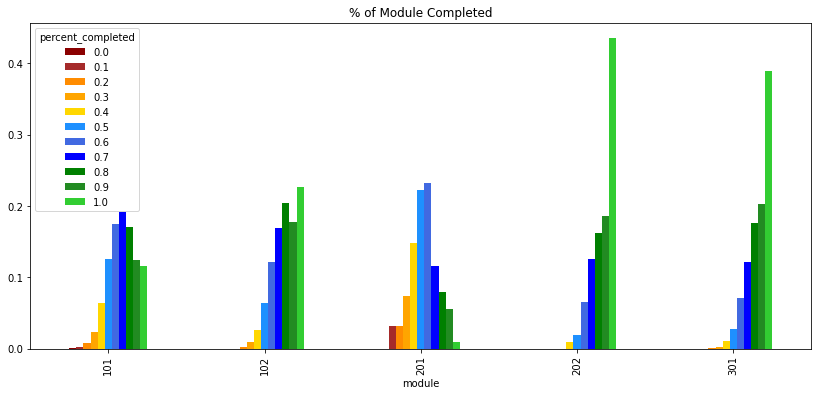

In [22]:
pd.crosstab(scan.module, scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module Completed", figsize=(14,6), color=eleven_grad)

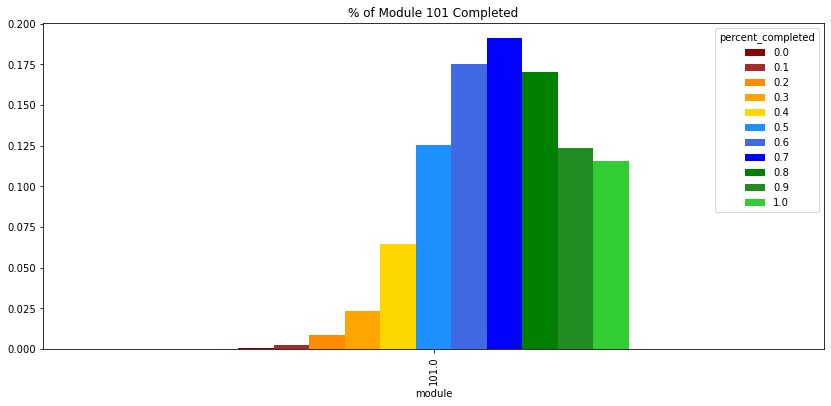

In [23]:
pd.crosstab(scan.module.where(scan.module==101), scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module 101 Completed", figsize=(14,6), color=eleven_grad)

In [24]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating)

,rating,1,2,3,4,5,6,7,8,9,10
offering_id,learning_product,,,,,,,,,,
877,I501,62,81,103,157,173,168,124,78,30,24
878,I501,48,76,119,169,179,179,115,71,32,12
879,I501,65,53,128,163,188,145,130,72,39,17
880,I501,56,66,105,178,177,158,122,71,37,30
881,I501,56,59,145,136,210,137,126,76,29,26
882,I501,59,72,108,154,183,168,134,71,36,15
883,I501,56,64,107,161,203,151,120,72,42,24
884,I501,53,65,116,154,177,165,120,87,36,27
885,I501,62,82,127,164,157,163,125,62,41,17


In [25]:
eight_grad=["darkred", "brown", "orange", "gold", "dodgerblue", "royalblue", "green", "forestgreen"]

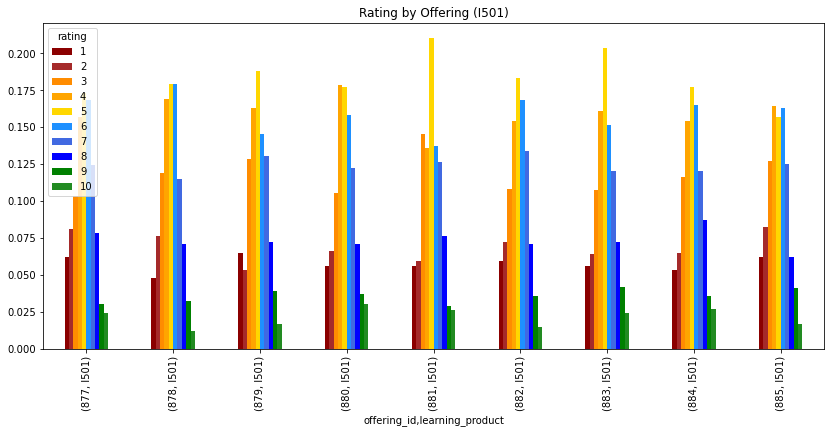

In [26]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating, normalize='index').plot(kind='bar', title="Rating by Offering (I501)", figsize=(14,6),
                                                                                                                        color=eleven_grad)

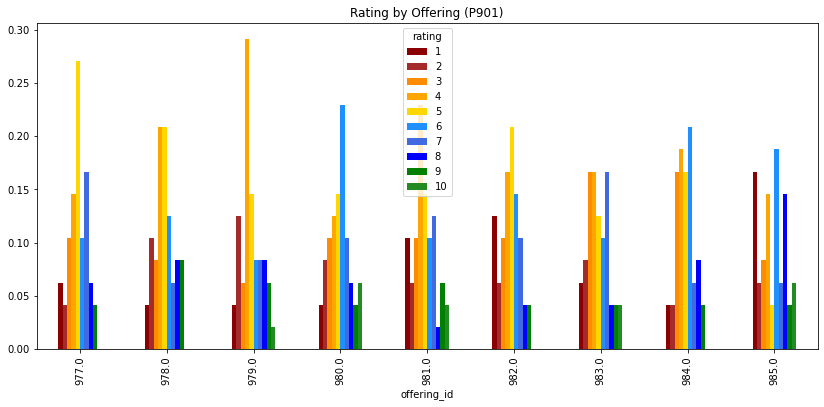

In [27]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6), color=eleven_grad)

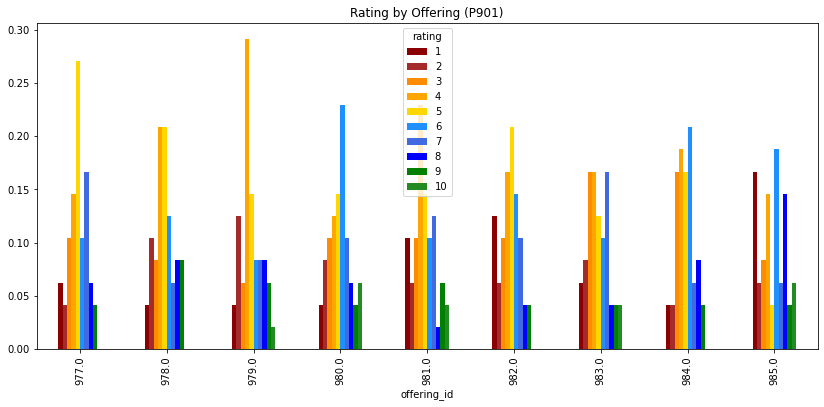

In [28]:
df.groupby(df["offering_id"].where(df.learning_product=="P901"))["rating"].value_counts(normalize=True).unstack().plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6),
                                                                                                                      color=eleven_grad)

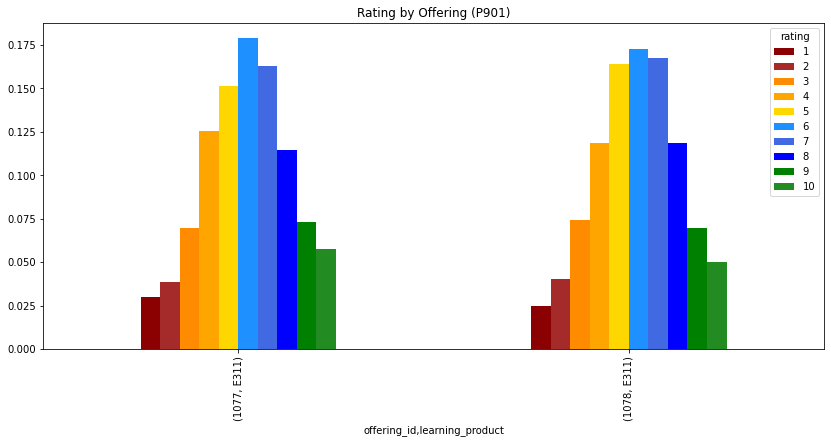

In [29]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="E311")], df.rating, normalize="index").plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6),
                                                                                                                      color=eleven_grad)

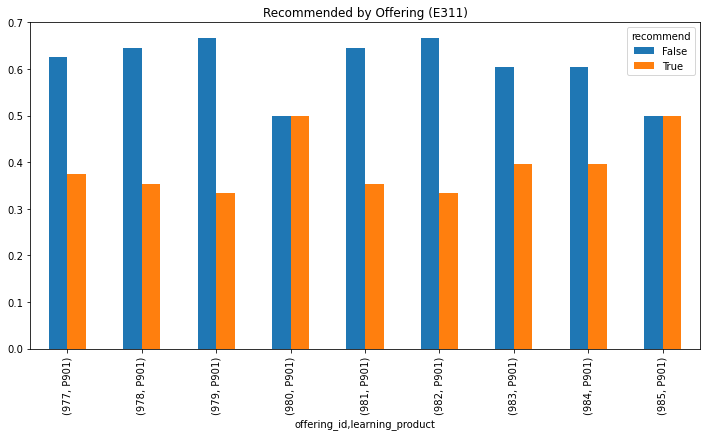

In [30]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="P901")], df.recommend, normalize="index").plot(kind='bar', title="Recommended by Offering (E311)", figsize=(12,6))

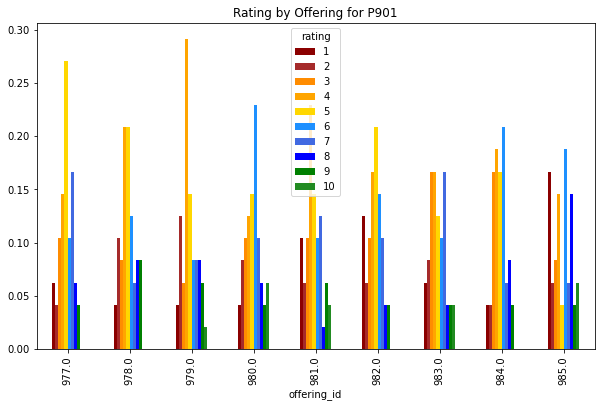

In [31]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(kind='bar', title="Rating by Offering for P901", figsize=(10,6), color=eleven_grad)

In [32]:
rating_offering = df[["learning_product", "rating"]]

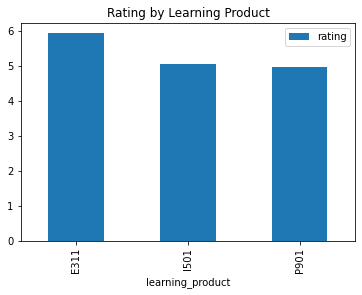

In [33]:
rating_offering.groupby("learning_product").agg("mean").plot(kind="bar", title="Rating by Learning Product")

In [34]:
rating_offering.groupby("learning_product").agg("mean")

,rating
learning_product,
E311,5.917500
I501,5.046667
P901,4.960648


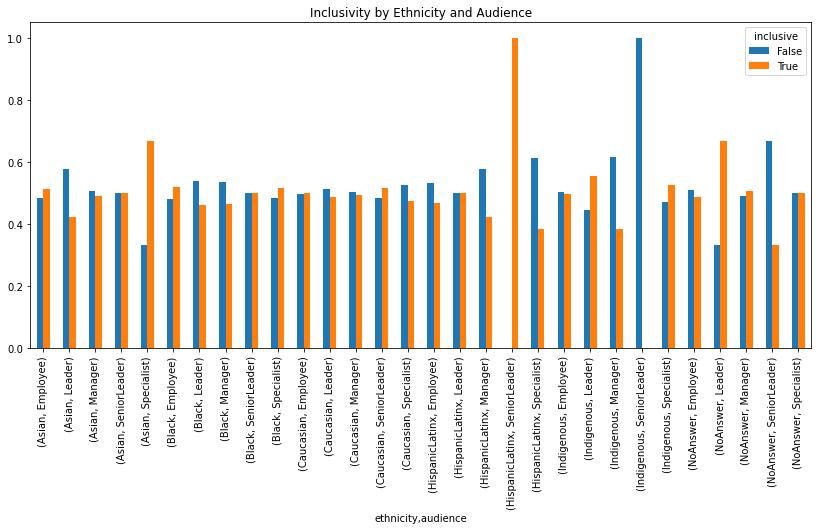

In [35]:
pd.crosstab([df.ethnicity, df.audience], df.inclusive, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity and Audience", figsize=(14,6))

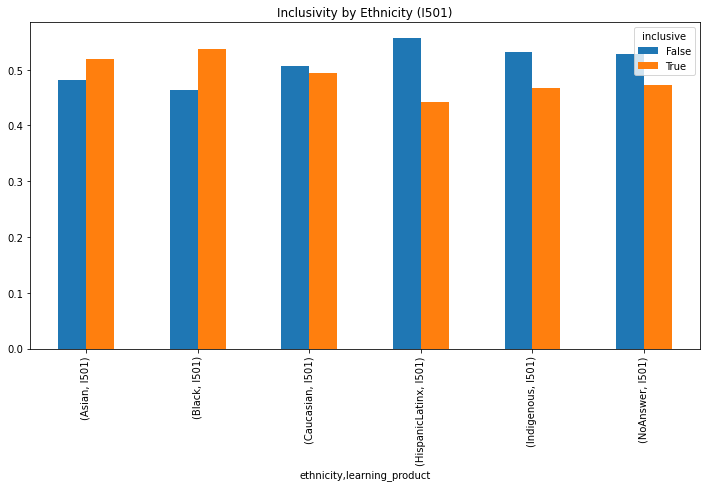

In [36]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="I501")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (I501)", figsize=(12,6))

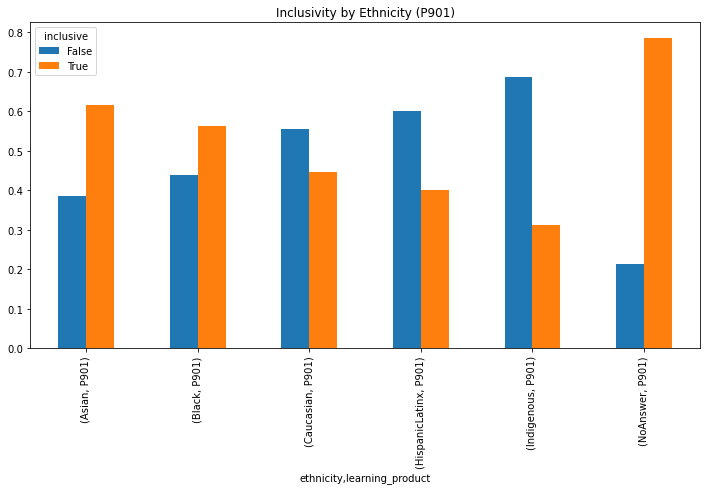

In [37]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="P901")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (P901)", figsize=(12,6))

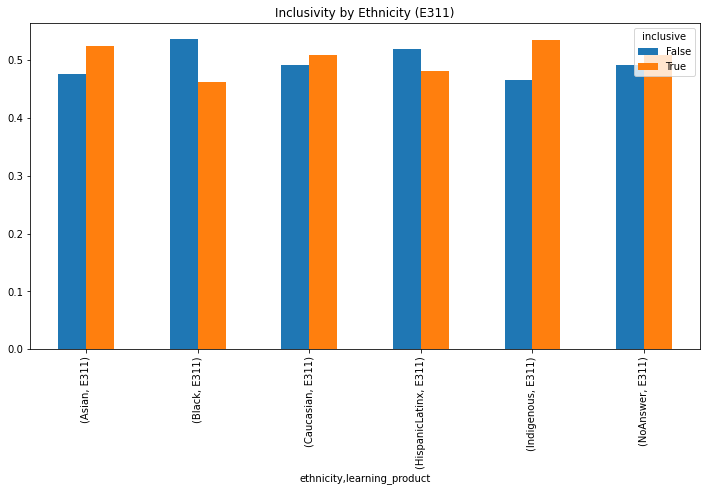

In [38]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="E311")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (E311)", figsize=(12,6))

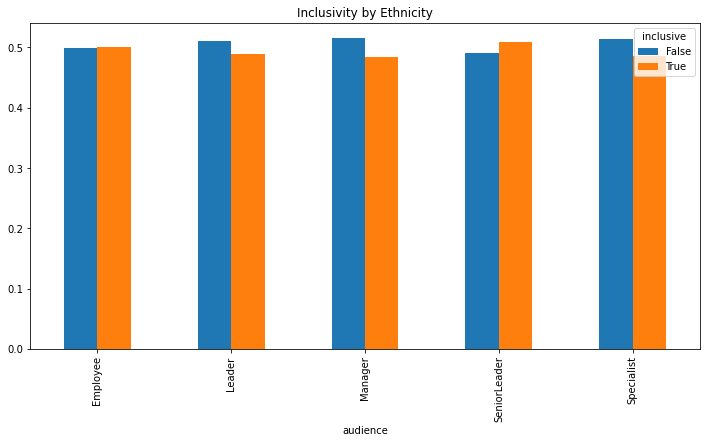

In [39]:
pd.crosstab(df.audience, df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity", figsize=(12,6))